In [10]:
from google.colab import files

uploaded=files.upload()

Saving Accounts.csv to Accounts.csv
Saving Accounts_properties.csv to Accounts_properties.csv
Saving Deals_to_Properties.csv to Deals_to_Properties.csv
Saving Opportunities.csv to Opportunities.csv
Saving Property_final.csv to Property_final.csv
Saving Test_Data.csv to Test_Data.csv


In [2]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize']=12,8

def plot_correlation_map( df ):
    corr = df.corr()
    ht , ax = plt.subplots( figsize =( 16 , 12 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    ht = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 })

In [3]:
import pandas as pd
import numpy as np
import random as rnd
import math
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics    
from sklearn import feature_selection
label=preprocessing.LabelEncoder()
import random as rnd

F:\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [5]:
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
def Mutual_info(X,y,NaN): #NaN=choose-'yes', 'no' or 'random fill'
    if NaN=='yes':
        print('Yes with NaNs')
        encode_exclude_nans(X)
    elif NaN=='random fill':
        print('Yeah with Random fill of NaNs..good choice')
        print('Please wait... Filling with Random generator so as to get accurate Mutual info score')
        encode_exclude_nans(X)
        fillnans_unique(X)
    elif NaN=='no':
        print('With NaNs of a particular column label encoded as single category ')
        encode_include_nans(X) 
    NF_variable=[]
    mi=[]
    for i in X: 
        x=X[i].ravel()    
#         score=metrics.mutual_info_score(x,y)
        score=nmi(x,y)
        #print(type(score),score)
        #break
        if score >0.25:
          mi.append(score)
          NF_variable.append(i)    
    Mutual_info=pd.DataFrame({'Non Funding Variables':NF_variable,'MI Score':mi})
    return Mutual_info,X

  
def encode_include_nans(data):
    for i in data:
        #t=X.loc[n_null,i].astype('category')
        #X.loc[n_null,i]=t.cat.codes
        #t=X[i].astype('category')
        #X[i]=t.cat.codes        
        try:
            data[i]=label.fit_transform(data[i])
        except:
            data[i]=label.fit_transform(data[i].astype('str'))
    return data

def encode_exclude_nans(data):
    for i in data:    
        n_null=data.loc[:,i].notnull()
        try:
#             print(i)
            data.loc[n_null,i]=label.fit_transform(data.loc[n_null,i])
        except:
#             print('exception',i)
            data.loc[n_null,i]=label.fit_transform((data.loc[n_null,i].astype('category').cat.codes))
    
    return data

def fillnans_unique(data):
    #a=np.arange(255,1000)
    for l,i in enumerate(data):
        data.loc[data[i].isna(),i]=data.loc[data[i].isna(),i].apply(lambda z: rnd.randint(data[i].min(),data[i].max()))
    return data
        #for k,j in enumerate(data[i].isna()):
         #   if j==True:
          #      data[i][k]=rnd.choice(a)

In [6]:
def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    #print(var,l,t)
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def intervals(df):
#     for i in ['year_tax_1','year_ops_1','year_ops_2', 'year_tax_2','year_combined_1','year_combined_2']:
    for i in df.columns:
#         df[i]=df[i].astype('float64')
        if df[i].dtypes=='float64' or df[i].dtypes=='int64' :
            print(i)
            print(i,df[i].max(),df[i].min())
            j=6
            while j<7 and j>1:
                try:
                    df[i+'_interval']=pd.qcut(df[i],j)
                    break
                except:
                    j=j-1
            if j==1:
                j=3
                df[i+'_interval']=pd.cut(df[i],j)
            print('bins=',j)
            df[i+'count']=df[i+'_interval']
            print(df.groupby([i+'_interval'],as_index=False).agg({i+'count':'count'}))
    return df

In [6]:
accounts=pd.read_csv('Accounts.csv')
accounts=intervals(accounts)

active_deals
active_deals 2215 0
bins= 5
  active_deals_interval  active_dealscount
0         (-0.001, 1.0]                938
1            (1.0, 2.0]                317
2            (2.0, 5.0]                482
3           (5.0, 14.0]                498
4        (14.0, 2215.0]                521
activity_count
activity_count 217301 0
bins= 6
  activity_count_interval  activity_countcount
0          (-0.001, 83.0]                  461
1           (83.0, 701.0]                  459
2         (701.0, 2354.0]                  458
3      (2354.0, 6420.333]                  459
4   (6420.333, 15160.667]                  459
5   (15160.667, 217301.0]                  460
num_deals_as_client
num_deals_as_client 333 0
bins= 3
  num_deals_as_client_interval  num_deals_as_clientcount
0              (-0.333, 111.0]                      2740
1               (111.0, 222.0]                        11
2               (222.0, 333.0]                         5
num_deals_as_investor
num_deals_as_investor

In [7]:
properties=pd.read_csv('Property_final.csv')
properties.drop('Unnamed: 0',axis=1,inplace=True)

F:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (42,75,76,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
test=pd.read_csv('Test_Data.csv')
opportunities=pd.read_csv('Opportunities.csv')
opportunities.drop(['id_deals.1'],inplace=True,axis=1)
opportunities=intervals(opportunities)
acc_prop=pd.read_csv("Accounts_properties.csv")
deals_prop=pd.read_csv("Deals_to_Properties.csv")

best_initial_bid
best_initial_bid 1447139865.0 0.0
bins= 3
     best_initial_bid_interval  best_initial_bidcount
0  (-1447139.865, 482379955.0]                  25021
1   (482379955.0, 964759910.0]                      5
2  (964759910.0, 1447139865.0]                      2
debt_yield
debt_yield 30.0 0.0
bins= 3
  debt_yield_interval  debt_yieldcount
0       (-0.03, 10.0]            13493
1        (10.0, 20.0]              353
2        (20.0, 30.0]                5
fiscalquarter
fiscalquarter 4 1
bins= 2
  fiscalquarter_interval  fiscalquartercount
0           (0.999, 3.0]               14681
1             (3.0, 4.0]               11348
fiscalyear
fiscalyear 2016 2002
bins= 3
  fiscalyear_interval  fiscalyearcount
0  (2001.999, 2004.0]             9119
1    (2004.0, 2012.0]             8682
2    (2012.0, 2016.0]             8228


In [9]:
properties.loc[properties.sale_date__c.notnull(),'fiscalyear']=properties.loc[properties.sale_date__c.notnull(),'sale_date__c'].map(lambda x: x.split('/')[2])
properties.loc[properties.sale_date__c.notnull(),'fiscalquarter']=properties.loc[properties.sale_date__c.notnull(),'sale_date__c'].map(lambda x: math.ceil(float(x.split('/')[0])/3))
properties['fiscalyear']=properties['fiscalyear'].astype('float64')
properties['fiscalquarter']=properties['fiscalquarter'].astype('float64')


properties.loc[properties['property_type_1']=='Medical Office Building','property_type_1']='Healthcare'
properties.loc[properties['property_type_1']=='Self-Storage','property_type_1']='Self Storage'
opportunities['property_type_1']=np.nan
for i in properties.property_type_1.unique():
    if i in opportunities.property_group.unique():
        opportunities.loc[opportunities.property_group==i,'property_type_1']=i
    elif i in opportunities.property_type.unique():
        opportunities.loc[opportunities.property_type==i,'property_type_1']=i
    else:
        print(i)
        

nan


In [0]:
# properties['com']='a'
# accounts['com']='a'
# train_accounts=accounts.loc[~accounts.id_accs.isin(test.id_accs.unique()),:]
# acc_prop_tot=train_accounts.merge(properties,on='com',how='outer')

In [0]:
prop_deal=acc_deal[acc_deal.accounting_date.notnull()].merge(properties[properties.sale_date__c.notnull()],left_on=('accounting_date','property_type_1'),right_on=('sale_date__c','property_type_1'),how='inner')
acc_opp_deal=acc_opp[acc_opp.accounting_date.notnull()].merge(properties[properties.sale_date__c.notnull()],left_on=('accounting_date','property_type_1'),right_on=('sale_date__c','property_type_1'),how='inner')
# deals_property=deals_opportunity[deals_opportunity.accounting_date.notnull()].merge(properties,left_on=('property_type_1','accounting_date'),right_on=('property_type_1','sale_date__c'),how='inner')
# acc_con_property=acc_con[acc_con.accounting_date.notnull()].merge(properties[properties.sale_date__c.notnull()],left_on=('accounting_date','property_type_1','id_props'),right_on=('sale_date__c','property_type_1','id_props'),how='inner')

In [0]:
acc_property_all=acc_property_all[acc_property_all.accounting_date.notnull()].drop_duplicates(subset='id_acc_prop')

In [0]:
prop_deal_date=prop_deal.merge(acc_property_all,on=('id_props','id_accs'),how='inner')

In [159]:
prop_deal_date.shape

(1420, 209)

In [160]:
prop_deal_date.groupby('id_accs',as_index=False).agg({'id_props':'nunique'}).id_props.sum()

1277

In [0]:
acc_opp_deal_date=acc_opp_deal.merge(acc_property_all,on=('id_props','id_accs'),how='inner')

In [164]:
acc_opp_deal_date.groupby('id_accs',as_index=False).agg({'id_props':'nunique'}).id_props.sum()

1277

In [168]:
diff=[]
for i in acc_opp_deal_date.id_acc_prop.unique():
  if i not in prop_acc_con_date.id_acc_prop.unique():
    diff.append(i)
    
diff1=[]
for i in prop_deal_date.id_acc_prop.unique():
  if i not in prop_acc_con_date.id_acc_prop.unique():
    diff1.append(i)
diff2=[]
for i in prop_acc_con_date.id_acc_prop.unique():
  if i not in acc_opp_deal_date.id_acc_prop.unique():
    diff2.append(i)
    
print(len(diff),len(diff1),len(diff2))

80 80 20


In [0]:
prop_acc_con_date=prop_acc_con.loc[prop_acc_con.accounting_date==prop_acc_con.sale_date__c,:]

In [17]:
prop_acc_con_date.groupby('id_accs',as_index=False).agg({'id_props':'nunique'}).id_props.sum()

1217

In [20]:
prop_acc_con_date.sale_status.value_counts()

N    1161
Y      66
Name: sale_status, dtype: int64

In [0]:
# prop_acc_con['fiscalyear1']=prop_acc_con['fiscalyear']
# prop_acc_con['fiscalquarter1']=prop_acc_con['fiscalquarter']
# prop_acc_con.columns[50:100]
properties.columns

In [0]:
cols=['buyer_book',
       'servicing_contract', 'investor_type', 'cmbs', 'consultant',
       'correspondent', 'foreign', 'master_servicer', 'lender_book',
       'loan_sales_book', 'loan_servicing']

cols1=['investor_type','active_deals_interval',
       'activity_count_interval','num_deals_as_client_interval',
       'num_deals_as_investor_interval','number_of_properties_interval',
       'number_of_related_deals_interval', 'number_of_related_properties_interval',
       'number_of_won_deals_as_client_interval']

cols3=['investor_type','deal_type','platform']
cols4=['investor_type','deal_type','platform', 'fiscalyear_interval','fiscalquarter_interval']

target=['deal_type','platform','property_type_1']

# target1=['best_initial_bid_interval','debt_yield_interval']
target2=['fiscalyear_interval','fiscalquarter_interval']

target3=['property_type_1','building_status','year_built_interval']
target4=['sale_amount__c_interval', 'size_sf_interval','price_per_sq_ft_interval']
# y=target
# y=encode_exclude_nans(target)
# X=encode_exclude_nans(prop_acc_con[cols])

# X=prop_acc_con[cols]
# X1=prop_acc_con[cols1]

In [0]:
# prop_acc_con.to_csv('Prop_Acc_Con.csv')
Prop_Acc_Con=pd.read_csv('Prop_Acc_Con.csv')
Prop_Acc_Con.drop('Unnamed: 0',axis=1,inplace=True)

In [0]:
prop_acc_con[cols+cols1+cols3+cols4].isnull().sum()

In [0]:
data=Prop_Acc_Con.copy()

In [85]:
data[target1+target2].isnull().sum()

best_initial_bid_interval     456
debt_yield_interval          1623
fiscalyear_interval             0
fiscalquarter_interval          0
dtype: int64

In [104]:
data[target1+target3].isnull().sum()

best_initial_bid_interval     456
debt_yield_interval          1623
property_type_1                51
building_status              3495
year_built_interval           432
dtype: int64

In [0]:
def transform(df):
#   df=encode_exclude_nans(df)
  df['all']='8'
  x=pd.DataFrame(df['all'])
  for i in df:
    if i=='all':
      break
    x['all']=df[i].astype('str')+x['all']  
  df['all']=x['all']
  df=encode_exclude_nans(df)
  return df

In [0]:
def MI(df,cols,target_cols):
  X=df[cols]
  for j in X.investor_type.unique():
    df_x=X[X.investor_type==j]
    print(j)
    df_x=transform(df_x)
    Target=df.loc[prop_acc_con.investor_type==j,target_cols]
    y=Target
    df_y=transform(y)

    for i in df_y:
      target=np.array(df_y[i]).ravel()
      M1,x=Mutual_info(df_x,target,NaN='random fill')
      print(j,i)
      print(M1)
  

In [0]:
MI(prop_acc_con,cols,target)

REIT


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


REIT deal_type
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
REIT platform
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
REIT property_type_1
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
REIT all
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Private Investor/Developer
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
Private Investor/Developer deal_type
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Yeah with Random fil

In [121]:
MI(data,cols,target2)

REIT


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


REIT fiscalyear_interval
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
REIT fiscalquarter_interval
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
REIT all
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Private Investor/Developer
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
Private Investor/Developer fiscalyear_interval
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
Private Investor/Developer fiscalquarter_interval
Empty DataFrame
Columns: [

In [122]:
MI(data,cols1,target)

REIT


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


REIT deal_type
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
REIT platform
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
REIT property_type_1
   MI Score Non Funding Variables
0  0.377848                   all
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
REIT all
   MI Score Non Funding Variables
0  0.415703                   all
Private Investor/Developer
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
Private Investor/Developer deal_type
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Yeah with Random fill 

In [123]:
MI(data,cols1,target2)

REIT


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.

Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


REIT fiscalyear_interval
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
REIT fiscalquarter_interval
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
REIT all
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Private Investor/Developer
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
Private Investor/Developer fiscalyear_interval
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
Private Investor/Developer fiscalquarter_interval
Empty DataFrame
Columns: [

In [124]:
MI(data,cols3,target3)

REIT


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


REIT property_type_1
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
REIT building_status
   MI Score Non Funding Variables
0  0.326271             deal_type
1  0.254088              platform
2  0.329099                   all
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
REIT year_built_interval
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
REIT all
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Private Investor/Developer
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
Private Investor/Developer property_type_1

In [125]:
MI(data,cols3,target4)

REIT


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.

Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


REIT sale_amount__c_interval
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
REIT size_sf_interval
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
REIT price_per_sq_ft_interval
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
REIT all
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Private Investor/Developer
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
Private Investor/Developer sale_amount__c_interval
Empty DataFrame
Columns: [MI Score, Non Fund

In [126]:
MI(data,cols4,target3)

REIT


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.

Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


REIT property_type_1
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
REIT building_status
   MI Score Non Funding Variables
0  0.326271             deal_type
1  0.254088              platform
2  0.265481   fiscalyear_interval
3  0.507060                   all
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
REIT year_built_interval
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
REIT all
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Private Investor/Developer
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
Private 

In [127]:
MI(data,cols4,target4)

REIT


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.

Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


REIT sale_amount__c_interval
   MI Score Non Funding Variables
0  0.291826                   all
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
REIT size_sf_interval
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
REIT price_per_sq_ft_interval
   MI Score Non Funding Variables
0  0.306244                   all
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
REIT all
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Private Investor/Developer
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
Private Investor/Developer sale_amount__c_interval
   MI Score Non Funding Variables
0  0.286424 

In [128]:
MI(data,cols3,target3+target4)

REIT


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.

Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


REIT property_type_1
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
REIT building_status
   MI Score Non Funding Variables
0  0.326271             deal_type
1  0.254088              platform
2  0.329099                   all
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
REIT year_built_interval
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
REIT sale_amount__c_interval
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
REIT size_sf_interval
Empty DataFrame
Columns: [M

In [130]:
MI(data,cols4,target3+target4)

REIT


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.

Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


REIT property_type_1
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
REIT building_status
   MI Score Non Funding Variables
0  0.326271             deal_type
1  0.254088              platform
2  0.265481   fiscalyear_interval
3  0.507060                   all
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
REIT year_built_interval
Empty DataFrame
Columns: [MI Score, Non Funding Variables]
Index: []
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
REIT sale_amount__c_interval
   MI Score Non Funding Variables
0  0.291826                   all
Yeah with Random fill of NaNs..good choice
Please wait... Filling with Random generator so as to get accurate Mutual info score
REIT size_sf_int

In [18]:
prop_acc_con.groupby('investor_type',as_index=False).agg({'id_accs':'count'})

,investor_type,id_accs
0,Account,6
1,Advisor/Equity Fund,2330
2,Agency,12
3,Bank / Thrift,222
4,Conduit/CMBS,53
5,Corporate Investor/User,282
6,Credit/Specialty Finance Company,105
7,Life Insurance Company,202
8,Pension Fund,34
9,Private Investor/Developer,4769


In [10]:
acc_property=accounts.merge(acc_prop,on='id_accs',how='inner')
prop_acc=acc_property.merge(properties,on='id_props',how='inner')


deals_opportunity=deals_prop.merge(opportunities,how='inner',on=('id_deals'))
acc_opp=opportunities.merge(accounts,how='inner',on='id_accs')
acc_con=deals_opportunity.merge(accounts,how='inner',on='id_accs')
prop_acc_con=acc_con.merge(properties,left_on=('id_props'),right_on=('id_props'),how='inner')

# acc_con['fiscalyear']=acc_con['fiscalyear'].astype('float64')
# acc_con['fiscalquarter']=acc_con['fiscalquarter'].astype('float64')

acc_nodeal=acc_opp.loc[~acc_opp.id_accs.isin(acc_con.id_accs.unique()),:]
acc_deal=acc_opp.loc[acc_opp.id_accs.isin(acc_con.id_accs.unique()),:]

acc_nodeal['fiscalyear']=acc_nodeal['fiscalyear'].astype('float64')
acc_nodeal['fiscalquarter']=acc_nodeal['fiscalquarter'].astype('float64')
# prop_nodeal_date=acc_nodeal.merge(properties,left_on=('accounting_date','property_type_1'),right_on=('sale_date__c','property_type_1'),how='inner')
# prop_nodeal=acc_nodeal.merge(properties,on=('fiscalyear','fiscalquarter','property_type_1'),how='inner')

F:\Anaconda\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
F:\Anaconda\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [0]:
# acc_property.groupby('id_props',as_index=False).agg({'id_accs':'nunique'}) one prop is bought by multiple accounts

In [11]:
prop_acc_con['property_type_1']=prop_acc_con['property_type_1_y']
prop_acc_con['fiscalyear']=prop_acc_con['fiscalyear_y']
prop_acc_con['fiscalquarter']=prop_acc_con['fiscalquarter_y']
prop_acc_con.drop(['property_type_1_y','property_type_1_x','fiscalyear_y','fiscalyear_x','fiscalquarter_y','fiscalquarter_x'],axis=1,inplace=True)

In [0]:
for i in prop_acc_con.columns:
    if i not in prop_acc.columns:
        print(i)

In [12]:
prop_acc_con=prop_acc_con[prop_acc.columns]

In [13]:
prop_acc_con['id_acc_prop']=prop_acc_con['id_accs']+prop_acc_con['id_props']
prop_acc['id_acc_prop']=prop_acc['id_accs']+prop_acc['id_props']

In [0]:
# inboth=[]
# for i in prop_acc_con.id_acc_prop.unique():
#   if i in prop_acc.id_acc_prop.unique():
#     inboth.append(i)
# len(inboth)

In [14]:
acc_prop_tot=pd.concat([prop_acc,prop_acc_con],ignore_index=True)

In [15]:
acc_prop_tot=acc_prop_tot.drop_duplicates(subset='id_acc_prop')
acc_prop_tot.shape

(24448, 129)

In [25]:
acc_prop_tot.sale_status.value_counts()

N    23184
Y     1206
Name: sale_status, dtype: int64

In [16]:
acc_prop_tot_y=acc_prop_tot[acc_prop_tot.sale_status!='N']
acc_prop_tot_y.id_props.nunique()

914

In [17]:
prop_left=properties.loc[~properties.id_props.isin(acc_prop.id_props.unique()),:]
prop_left_y=prop_left[prop_left.sale_status=='Y']
prop_left_yan=prop_left[prop_left.sale_status!='N']
tot_prop_left=properties.loc[(~properties.id_props.isin(acc_prop.id_props.unique()))|(properties.id_props.isin(acc_prop_tot_y.id_props.unique())),:]
tot_prop_left_y=tot_prop_left[tot_prop_left.sale_status=='Y']
tot_prop_left_yan=tot_prop_left[tot_prop_left.sale_status!='N']


In [18]:
prop_acc_count=acc_prop_tot.groupby('id_accs',as_index=False).agg({'id_props':'count'})
prop_acc_count['prop_acc_count']=prop_acc_count['id_props']
prop_acc_count.drop('id_props',axis=1,inplace=True)

In [19]:
prop_acc_count[prop_acc_count.prop_acc_count>30].shape

(144, 2)

In [0]:
# prop_acc_count.id_accs.nunique()
# prop_acc_count.id_props.mean()
# prop_acc_count.id_props.max()

In [0]:
# acc_prop_count=acc_property.groupby('id_accs',as_index=False).agg({'id_props':'nunique'})
# acc_prop_count['acc_prop_count']=acc_prop_count['id_props']
# acc_prop_count.drop('id_props',axis=1,inplace=True)

In [0]:
# acc_opp.merge(test,on='id_accs',how='inner') 0 rows

In [20]:
acc_property['id_acc_prop']=acc_property.id_accs + acc_property.id_props
acc_con['id_acc_prop']=acc_con.id_accs + acc_con.id_props
acc_property_all=pd.concat([acc_con,acc_property],ignore_index=True)
acc_property_all=acc_property_all.drop_duplicates(subset='id_acc_prop')

In [0]:
prop_acc_all_count=acc_property_all.groupby('id_accs',as_index=False).agg({'id_props':'nunique'})
prop_acc_all_count['prop_acc_all_count']=prop_acc_all_count['id_props']
prop_acc_all_count.drop('id_props',axis=1,inplace=True)

In [0]:
# prop_acc_all_count.id_props.max()
# prop_acc_all_count.id_props.mean()

In [0]:
# prop_nodeal_count=prop_nodeal.groupby('id_accs',as_index=False).agg({'id_props':'count'})
# prop_nodeal_count['prop_nodeal_count']=prop_nodeal_count['id_props']
# prop_nodeal_count.drop('id_props',axis=1,inplace=True)++

In [0]:
deal_activity=acc_opp.groupby('id_accs',as_index=False).agg({'id_deals':'count'})
deal_activity['id_deals_count']=deal_activity['id_deals']
deal_activity.drop('id_deals',axis=1,inplace=True)
prop_activity=acc_con.groupby('id_accs',as_index=False).agg({'id_props':'count'})
prop_activity['id_props_count']=prop_activity['id_props']
prop_activity.drop('id_props',axis=1,inplace=True)

In [0]:
Accounts=accounts.merge(acc_prop_count,on='id_accs',how='left').merge(prop_acc_count,on='id_accs',how='left').merge(prop_acc_all_count,on='id_accs',how='left').merge(deal_activity,on='id_accs',how='left').merge(prop_activity,on='id_accs',how='left')

In [21]:
prop_count=accounts.merge(prop_acc_count,on='id_accs',how='inner')#.merge(prop_acc_all_count,on='id_accs',how='inner')

In [22]:
prop_count.id_accs.nunique()

2663

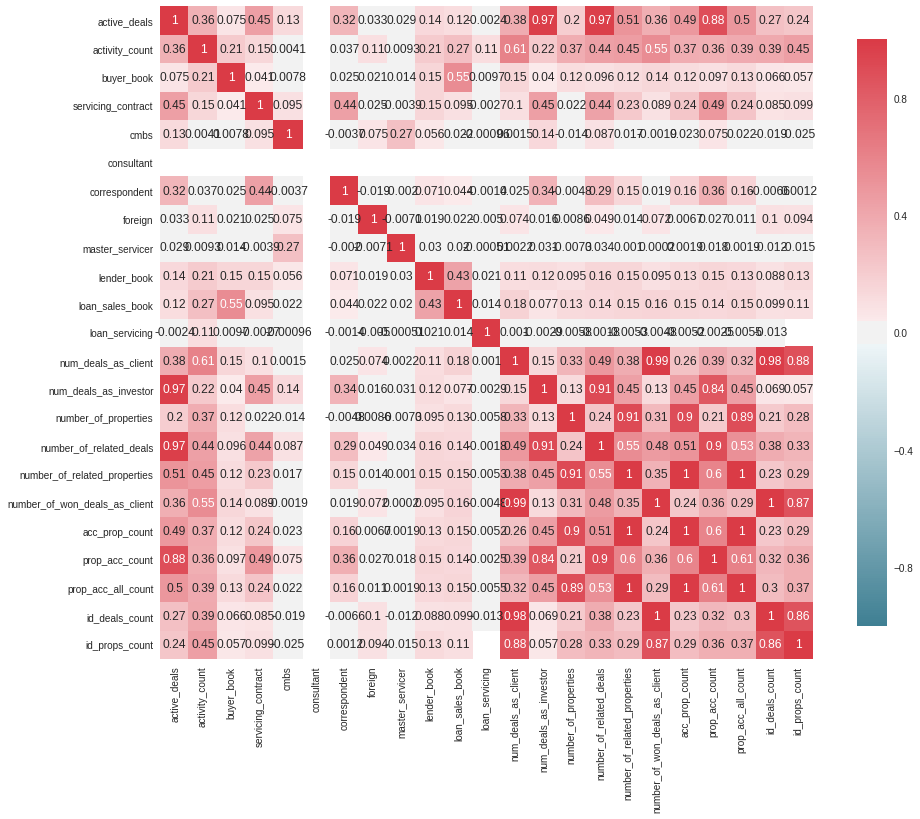

In [93]:
ax=plot_correlation_map(Accounts)
plt.show(ax)

In [0]:
Accounts.loc[:,['prop_acc_count','number_of_related_deals','num_deals_as_investor','number_of_related_properties','number_of_properties']]

In [23]:
acc_prop_tot.to_csv('acc_prop_tot.csv')

In [24]:
inv_prop=acc_prop_tot.groupby(['investor_type'], as_index=False).agg({'id_accs':'count'})
inv_prop['p3']=inv_prop['id_accs']
inv_prop.drop('id_accs',axis=1,inplace=True)
inv_prop

,investor_type,p3
0,Account,130
1,Advisor/Equity Fund,3593
2,Agency,1151
3,Bank / Thrift,4452
4,Conduit/CMBS,753
5,Corporate Investor/User,644
6,Credit/Specialty Finance Company,506
7,Endowment,1
8,Life Insurance Company,2358
9,Pension Fund,87


In [25]:
prop_type=acc_prop_tot.groupby(['property_type_1'], as_index=False).agg({'id_accs':'count'})
prop_type['p2']=prop_type['id_accs']
prop_type.drop('id_accs',axis=1,inplace=True)
prop_type

,property_type_1,p2
0,Biotech,61
1,Healthcare,544
2,Hotel-Lodging,1132
3,Industrial,3116
4,Land,311
5,Multi-Housing,7705
6,Office,5820
7,Other,208
8,Retail,4462
9,Self Storage,466


In [26]:
inv_acc=acc_prop_tot.groupby(['investor_type','property_type_1'], as_index= False).agg({'id_accs':'count'})
inv_acc['p1']=inv_acc['id_accs']
inv_acc.drop('id_accs',axis=1,inplace=True)
inv_acc

,investor_type,property_type_1,p1
0,Account,Healthcare,3
1,Account,Hotel-Lodging,2
2,Account,Industrial,37
3,Account,Multi-Housing,22
4,Account,Office,41
5,Account,Other,1
6,Account,Retail,24
7,Advisor/Equity Fund,Biotech,6
8,Advisor/Equity Fund,Healthcare,58
9,Advisor/Equity Fund,Hotel-Lodging,173


In [27]:
investor_property=inv_acc.merge(inv_prop,on='investor_type',how='inner')
investor_property=investor_property.merge(prop_type,on='property_type_1',how='inner')
investor_property

,investor_type,property_type_1,p1,p3,p2
0,Account,Healthcare,3,130,544
1,Advisor/Equity Fund,Healthcare,58,3593,544
2,Agency,Healthcare,1,1151,544
3,Bank / Thrift,Healthcare,93,4452,544
4,Conduit/CMBS,Healthcare,27,753,544
5,Corporate Investor/User,Healthcare,61,644,544
6,Credit/Specialty Finance Company,Healthcare,28,506,544
7,Life Insurance Company,Healthcare,60,2358,544
8,Pension Fund,Healthcare,1,87,544
9,Private Investor/Developer,Healthcare,106,7758,544


In [28]:
investor_property['prop_inv_ratio']=(investor_property['p1']/investor_property['p2'])/investor_property['p3']
investor_property.drop(['p1','p3','p2'],axis=1,inplace=True)
investor_property=intervals(investor_property)

prop_inv_ratio
prop_inv_ratio 0.000588928150766 2.78822121524e-07
bins= 6
    prop_inv_ratio_interval  prop_inv_ratiocount
0  (-0.000999721, 2.14e-05]                   24
1      (2.14e-05, 3.16e-05]                   23
2      (3.16e-05, 3.87e-05]                   23
3      (3.87e-05, 4.65e-05]                   23
4      (4.65e-05, 7.41e-05]                   23
5      (7.41e-05, 0.000589]                   23


In [230]:
# acc_per_prop=acc_prop_tot.groupby('id_props',as_index=False).agg({'id_accs':'nunique'})
# acc_per_prop['acc_per_prop']=acc_per_prop['id_accs']
# acc_per_prop.drop('id_accs',inplace=True,axis=1)
acc_per_prop.acc_per_prop.mean()

1.5920812711643657

In [235]:
acc_per_prop[acc_per_prop.acc_per_prop>2].shape

(1542, 2)

In [29]:
test_acc=test.merge(accounts,on='id_accs',how='inner')
test_acc.groupby('investor_type',as_index=False).agg({'id_accs':'count'})

,investor_type,id_accs
0,Advisor/Equity Fund,15
1,Bank / Thrift,1
2,Life Insurance Company,10
3,Private Investor/Developer,3


In [32]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
reg_col=['active_deals', 'activity_count', 'num_deals_as_client',
       'num_deals_as_investor', 'number_of_properties',
       'number_of_related_deals', 'number_of_related_properties',
       'number_of_won_deals_as_client']
# reg_col1=['active_deals','num_deals_as_investor','number_of_related_deals', 'number_of_related_properties']
X=prop_count[reg_col]
y=prop_count['prop_acc_count']
# poly= PolynomialFeatures(degree=2)
# X_=poly.fit_transform(X)
regr = linear_model.LinearRegression()
regr.fit(X,y)
# regr.fit(X_,y)
# print(regr.score(X_,y))
print(regr.score(X,y))
# predict_ = poly.fit_transform(test_acc[reg_col])
test_acc['props_count_lin'] = regr.predict(test_acc[reg_col])
# test_acc['props_count_poly2'] = regr.predict(predict_) 
# test_acc['props_count_poly3'] = regr.predict(predict_) 

0.949810452841


In [0]:
prop_count['diff']=abs(prop_count.props_count_lin - prop_count.prop_acc_count)

In [208]:
prop_count.loc[prop_count.prop_acc_count>25,'diff'].sum()

2683.3434292430316

In [0]:
prop_count['diff_poly']=abs(prop_count.props_pred - prop_count.prop_acc_count)

In [204]:
prop_count.loc[prop_count.prop_acc_count>25,'diff_poly'].sum()

1297.1961155444876

In [0]:
# pred=poly.fit_transform(prop_count[reg_col])
# prop_count['props_pred']=regr.predict(pred)
# prop_count[prop_count.props_pred<0]
regr.fit(X,y)
# print(regr.score(X_,y))
prop_count['props_count_lin']=regr.predict(prop_count[reg_col])

In [219]:
prop_count.loc[prop_count.prop_acc_count >500,['props_count_lin','props_pred','prop_acc_count','number_of_related_deals','num_deals_as_investor','number_of_related_properties','number_of_properties']]

,props_count_lin,props_pred,prop_acc_count,number_of_related_deals,num_deals_as_investor,number_of_related_properties,number_of_properties
21,897.099775,919.053551,919,1576,1491,1152,1
165,563.268688,524.927149,525,1368,1056,766,133


In [33]:
# test_acc.drop('props_count_poly',axis=1,inplace=True)
test_acc.loc[test_acc.props_count_poly3<0,'props_count_cor']=(test_acc.loc[test_acc.props_count_poly3<0,'props_count_poly2']+test_acc.loc[test_acc.props_count_poly3<0,'props_count_lin'])/2
test_acc.loc[test_acc.props_count_poly3>0,'props_count_cor']=test_acc.loc[test_acc.props_count_poly3>0,'props_count_poly3']
test_acc['props_count_cor2']=(test_acc.props_count_poly2+test_acc.props_count_lin)/2
print(test_acc.props_count_lin.sum(),test_acc.props_count_poly2.sum(),test_acc.props_count_cor.sum(),test_acc.props_count_cor2.sum())

3109.80124775 3152.81246489 6924.07731367 3131.30685632


In [0]:
test_acc.loc[:,['props_count_lin','props_count_poly2','props_count_poly3','props_count_cor','props_count_cor2','number_of_related_deals','num_deals_as_investor','number_of_related_properties','number_of_properties']]

In [34]:
test_acc.to_csv('test_acc.csv')

In [229]:
acc_prop_tot.merge

Index(['id_accs', 'active_deals', 'activity_count', 'buyer_book',
       'servicing_contract', 'investor_type', 'cmbs', 'consultant',
       'correspondent', 'foreign', 'master_servicer', 'lender_book',
       'loan_sales_book', 'loan_servicing', 'num_deals_as_client',
       'num_deals_as_investor', 'number_of_properties',
       'number_of_related_deals', 'number_of_related_properties',
       'number_of_won_deals_as_client', 'active_deals_interval',
       'active_dealscount', 'activity_count_interval', 'activity_countcount',
       'num_deals_as_client_interval', 'num_deals_as_clientcount',
       'num_deals_as_investor_interval', 'num_deals_as_investorcount',
       'number_of_properties_interval', 'number_of_propertiescount',
       'number_of_related_deals_interval', 'number_of_related_dealscount',
       'number_of_related_properties_interval',
       'number_of_related_propertiescount',
       'number_of_won_deals_as_client_interval',
       'number_of_won_deals_as_clientcount

In [35]:
prop_acc_count_2=prop_acc_count[prop_acc_count.prop_acc_count>1]
prop_acc_count_1=prop_acc_count[prop_acc_count.prop_acc_count<2]
prop_acc_count_1=intervals(prop_acc_count_1)
prop_acc_count_2=intervals(prop_acc_count_2)
prop_acc_count.loc[prop_acc_count.prop_acc_count>1,'prop_acc_count_interval']=prop_acc_count_2.prop_acc_count_interval
prop_acc_count.loc[prop_acc_count.prop_acc_count<2,'prop_acc_count_interval']=prop_acc_count_1.prop_acc_count_interval

prop_acc_count
prop_acc_count 1 1
bins= 

F:\Anaconda\lib\site-packages\ipykernel\__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
F:\Anaconda\lib\site-packages\ipykernel\__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3
  prop_acc_count_interval  prop_acc_countcount
0         (0.999, 0.9997]                    0
1        (0.9997, 1.0003]                  991
2         (1.0003, 1.001]                    0
prop_acc_count
prop_acc_count 919 2
bins= 4
  prop_acc_count_interval  prop_acc_countcount
0            (1.999, 3.0]                  588
1              (3.0, 5.0]                  272
2             (5.0, 12.0]                  407
3           (12.0, 919.0]                  405


F:\Anaconda\lib\site-packages\ipykernel\__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [38]:
prop_acc_count.prop_acc_count_interval.value_counts()

(0.9997, 1.0003]    991
(1.999, 3.0]        588
(5.0, 12.0]         407
(12.0, 919.0]       405
(3.0, 5.0]          272
Name: prop_acc_count_interval, dtype: int64

In [39]:
prop_acc_count.to_csv('prop_acc_count.csv')

In [40]:
acc_prop_total=acc_prop_tot.merge(prop_acc_count,on='id_accs',how='left')

In [41]:
acc_prop_total=acc_prop_total.merge(investor_property,on=('investor_type','property_type_1'),how='left')

In [42]:
acc_prop_total.to_csv('acc_prop_total.csv')

In [7]:
acc_prop_total=pd.read_csv('acc_prop_total.csv')
acc_prop_total.drop('Unnamed: 0',axis=1,inplace=True)

In [43]:
import math
print(math.ceil(5.1))

6


In [47]:
for i in test_acc:
    if i in ['props_count_lin','props_count_poly2','props_count_poly3','props_count_cor','props_count_cor2']:
        test_acc.loc[:,i]=test_acc.loc[:,i].apply(lambda z: math.ceil(z))

In [48]:
test_acc[['props_count_lin','props_count_poly2','props_count_poly3','props_count_cor','props_count_cor2']]

,props_count_lin,props_count_poly2,props_count_poly3,props_count_cor,props_count_cor2
0,83,87,296,296,85
1,140,136,283,283,138
2,255,243,-429,249,249
3,136,152,283,283,144
4,99,99,70,70,99
5,135,117,151,151,126
6,156,206,-237,181,181
7,35,36,46,46,36
8,61,63,202,202,62
9,21,20,26,26,20


In [49]:
test_acc['key']='a'
prop_left['key']='a'
test_acc_prop=test_acc.merge(prop_left,on='key')
prop_left_y['key']='a'
test_acc_prop_y=test_acc.merge(prop_left_y,on='key')
prop_left_yan['key']='a'
test_acc_prop_yan=test_acc.merge(prop_left_yan,on='key')


F:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
F:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
F:\Anaconda\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexin

In [50]:
test_acc_prop.to_csv('test_acc_prop.csv')
test_acc_prop_y.to_csv('test_acc_prop_y.csv')
test_acc_prop_yan.to_csv('test_acc_prop_yan.csv')

In [8]:
test_acc_prop=pd.read_csv('test_acc_prop.csv')
test_acc_prop.drop('Unnamed: 0',axis=1,inplace=True)
test_acc_prop_y=pd.read_csv('test_acc_prop_y.csv')
test_acc_prop_y.drop('Unnamed: 0',axis=1,inplace=True)                   
test_acc_prop_yan=pd.read_csv('test_acc_prop_yan.csv')
test_acc_prop_yan.drop('Unnamed: 0',axis=1,inplace=True)

F:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (44,45,69,72,75,78,81,84,89,90,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:

col=['buyer_book',
       'servicing_contract', 'cmbs', 'consultant',
       'correspondent', 'foreign', 'master_servicer', 'lender_book',
       'loan_sales_book', 'loan_servicing','active_deals_interval',
       'activity_count_interval','num_deals_as_client_interval','num_deals_as_investor_interval', 
       'number_of_properties_interval', 'number_of_related_deals_interval', 
       'number_of_related_properties_interval','number_of_won_deals_as_client_interval', 'building_status',
       'city','class', 'county', 'sale_status', 'portfolio', 'market','property_type_1', 'region__c',
       'num_buildings_interval', 'num_floors_interval', 'num_parking_spaces_interval',
       'occupancy_rate_interval', 'price_per_sq_ft_interval',
       'price_per_unit_interval', 'sale_amount__c_interval',
       'size_acres_interval', 'size_sf_interval', 'size_units_interval', 
       'year_built_interval', 'Taxprice_1_interval', 'Opsprice_1_interval', 
       'Opsprice_2_interval', 'Opsprice_2count', 'Taxprice_2_interval',
       'Combinedprice_1_interval','Combinedprice_2_interval',
       'year_tax_1_interval', 'year_ops_1_interval', 'year_ops_2_interval', 
       'year_tax_2_interval', 'year_combined_1_interval', 'year_combined_2_interval',
       'fiscalyear', 'fiscalquarter', 'prop_acc_count_interval','prop_inv_ratio_interval']
# acc_prop_total.columns[50:]'investor_type'

In [10]:

target=acc_prop_total[['property_type_1','investor_type']]


In [11]:
# train=acc_prop_total[col]
# train.to_csv('trainone.csv')
train=pd.read_csv('trainone.csv')
train.drop('Unnamed: 0',axis=1,inplace=True)
train=encode_exclude_nans(train)

In [12]:
target=encode_exclude_nans(target)
target=fillnans_unique(target)

F:\Anaconda\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
F:\Anaconda\lib\site-packages\ipykernel\__main__.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
F:\Anaconda\lib\site-packages\ipykernel\__main__.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
target=target.investor_type

In [14]:
classes={}
for i,j in enumerate(list(label.classes_)):
  classes[i]=j

In [15]:
classes

{0: 'Account',
 1: 'Advisor/Equity Fund',
 2: 'Agency',
 3: 'Bank / Thrift',
 4: 'Conduit/CMBS',
 5: 'Corporate Investor/User',
 6: 'Credit/Specialty Finance Company',
 7: 'Endowment',
 8: 'Life Insurance Company',
 9: 'Pension Fund',
 10: 'Private Investor/Developer',
 11: 'Property Lender',
 12: 'Property Owner',
 13: 'REIT',
 14: 'Sovereign Wealth Fund',
 15: 'Special Servicer',
 16: 'Tenants in Common',
 17: 'Unknown'}

In [16]:
train_X, test_X, train_target, test_target= train_test_split(train , target, train_size = 0.7,stratify=target,random_state=17)

In [ ]:
params={'objective': 'multi:softprob','max_depth': 5,'num_class':18,'eta': 0.3, 'eval_metric':'merror' ,'silent':0}   
xgtrain = xgb.DMatrix(train_X.values, label=train_target.values)
xgtest= xgb.DMatrix(test_X.values,label=test_target.values) 

watchlist =  [(xgtest, 'eval'), (xgtrain, 'train')]
num_round=165

model=xgb.train(params,xgtrain,num_round,watchlist)
# 'colsample_bytree':0.8,'subsample':0.8

In [0]:
# xgb1 = XGBClassifier(learning_rate =0.01,n_estimators=80,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,
#  objective= 'binary:logistic')
# xgb1.fit(train_X.astype('float64'),train_target,eval_metric='auc')

In [0]:
test_x= xgb.DMatrix(test_X.values)
pred_prob=model.predict(test_x)

In [95]:
pred_prob.shape

(7335, 18)

In [0]:
best_preds = np.asarray([np.argmax(line) for line in pred_prob])
# print "Numpy array precision:", precision_score(y_test, best_preds, average='macro')

In [104]:
best_preds[0:1]

array([8])

In [111]:
for line in pred_prob[0:1]:
  print(np.argmax(line))

8


In [0]:
pred=pd.DataFrame(pred_prob)

In [145]:
test_acc_prop.shape

(106865, 134)

In [0]:
test_acc_prop=test_acc_prop.merge(test_prop_acc_count,on='id_accs',how='inner')

In [0]:
test_acc_prop['prop_acc_count_interval']=4
test_acc_prop=test_acc_prop.merge(investor_property,on=('investor_type','property_type_1'),how='left')

In [0]:
pred

In [0]:
# Test_Acc_Prob=test_acc_prop[col]
Test_Acc_Prob.to_csv('Test_Acc_Prob.csv')
Test_Acc_Prob=pd.read_csv('Test_Acc_Prob.csv')
Test_Acc_Prob.drop('Unnamed: 0',axis=1,inplace=True)
Test_Acc_Prob=encode_exclude_nans(Test_Acc_Prob)
# Test_Acc_Prob.prop_acc_count_interval=4
Test_Acc_Prob=Test_Acc_Prob[col]
# test_acc_prop_pred=xgb.DMatrix(Test_Acc_Prob.values)
# test_acc_prop_pred=model.predict(test_acc_prob_pred)
# test_acc_prop_pred=pd.DataFrame(test_acc_prop_pred)

NameError: ignored

In [0]:
test_pred=pd.concat([test_acc_prop,test_acc_prop_pred], axis=1)

In [208]:
for k in test_pred.id_accs.unique():
  for i in test_pred[test_pred.id_accs==k].investor_type.unique():
    clas=list(classes.keys())[list(classes.values()).index(i)]
    acc=test_pred.loc[test_pred.id_accs==k,['id_accs','id_props','props_count_cor2',clas]].sort_values(by=clas,ascending=False)
  break

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [209]:
acc[0:10]

,id_accs,id_props,props_count_cor2,1
1931,0012A00002AXHJUQA5,a0I2A00000XQLVrUAP,NaN,0.973566
1664,0012A00002AXHJUQA5,a0I2A00000XQKlcUAH,NaN,0.970559
436,0012A00002AXHJUQA5,a0I2A00000XQHSkUAP,NaN,0.965582
2552,0012A00002AXHJUQA5,a0I2A00000XvA3uUAF,NaN,0.963335
2050,0012A00002AXHJUQA5,a0I2A00000XQLq1UAH,NaN,0.954736
1706,0012A00002AXHJUQA5,a0I2A00000XQKsgUAH,NaN,0.954250
1267,0012A00002AXHJUQA5,a0I2A00000XQJfPUAX,NaN,0.947302
3036,0012A00002AXHJUQA5,a0I2A00000YIS6RUAX,NaN,0.934500
2970,0012A00002AXHJUQA5,a0I2A00000YGcP1UAL,NaN,0.925965
1551,0012A00002AXHJUQA5,a0I2A00000XQKSoUAP,NaN,0.923339


In [187]:
classes

{0: 'Account',
 1: 'Advisor/Equity Fund',
 2: 'Agency',
 3: 'Bank / Thrift',
 4: 'Conduit/CMBS',
 5: 'Corporate Investor/User',
 6: 'Credit/Specialty Finance Company',
 7: 'Endowment',
 8: 'Life Insurance Company',
 9: 'Pension Fund',
 10: 'Private Investor/Developer',
 11: 'Property Lender',
 12: 'Property Owner',
 13: 'REIT',
 14: 'Sovereign Wealth Fund',
 15: 'Special Servicer',
 16: 'Tenants in Common',
 17: 'Unknown'}

In [183]:
mydict = {'george':'a','amber':19}
print(list(mydict.keys())[list(mydict.values()).index('a')])

george


In [205]:
prop_left_y.shape

(733, 91)

In [0]:
# Test_Acc_Prob.columns==train.columns
# test_acc_prop_pred=xgb.DMatrix(Test_Acc_Prob.values)
# test_acc_prop_pred=model.predict(test_acc_prop_pred)
# test_acc_prop_pred=pd.DataFrame(test_acc_prop_pred)

In [0]:
prop_label=acc_prop_total[['investor_type','prop_acc_count_interval']]
prop_label=encode_exclude_nans(prop_label)
# target=fillnans_unique(target)

In [0]:
list(label.classes_)